# Import

In [2]:
import os, warnings

# data
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder
# metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
# estimators
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Visuaisation
import matplotlib.pyplot as plt

In [3]:
# Warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

# Load data

In [4]:
path = "./data/cleaned/"
filename = "df_cleaned.csv"

In [5]:
df = pd.read_csv(path + filename)
df.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# data preparation

In [6]:
# X & y
X = df.drop(columns="target")
y = df.target

In [7]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

## Test Train split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
print(f"X_train = {X_train.shape} et y_train = {y_train.shape} \nx_test = {X_test.shape} et y_test={y_test.shape}")

X_train = (5686, 21) et y_train = (5686,) 
x_test = (2438, 21) et y_test=(2438,)


# Modelisation

## Dummy classifier

In [10]:
estimator = DummyClassifier(strategy="most_frequent")
estimator.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [11]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
pd.Series(y_pred).value_counts()

0    2438
dtype: int64

In [13]:
y_test.value_counts(normalize=True)

0    0.515587
1    0.484413
Name: target, dtype: float64

In [14]:
y_test.values

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [15]:
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)

print(f"score train : {tr_score} score test : {te_score} ")

score train : 0.519 score test : 0.5156 


In [16]:
def score(estimator) :
    """compute and print train score and test score"""
    tr_score = estimator.score(X_train, y_train).round(4)
    te_score = estimator.score(X_test, y_test).round(4)
    print(f"score train : {tr_score} score test : {te_score}")

In [17]:
score(estimator)

score train : 0.519 score test : 0.5156


In [18]:
pd.Series(y_train).value_counts(normalize=True).round(4)

0    0.519
1    0.481
Name: target, dtype: float64

In [19]:
pd.Series(y_test).value_counts(normalize=True).round(4)

0    0.5156
1    0.4844
Name: target, dtype: float64

In [20]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[1257,    0],
       [1181,    0]], dtype=int64)

In [21]:
mat  = pd.DataFrame(mat)
mat

,0,1
0,1257,0
1,1181,0


In [22]:
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [23]:
def confusion(y_test, y_pred) :
    """display a fancy confusion matrix"""
    mat = confusion_matrix(y_test, y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f"pred_{i}" for i in mat.columns]
    mat.index = [f"test_{i}" for i in mat.index]

    return mat

In [24]:
confusion(y_test, y_pred)

,pred_0,pred_1
test_0,1257,0
test_1,1181,0


In [25]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

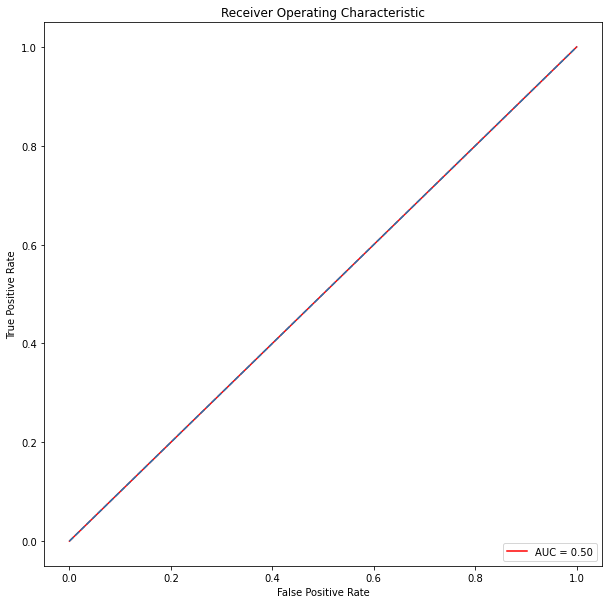

In [26]:
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color='red', label="AUC = %0.2f" % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Simple Logistic regression & Linear SVM

### Logistic Regression

In [27]:
estimator = LogisticRegression(solver="liblinear")
estimator.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [28]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [29]:
y_prob = estimator.predict_proba(X_test).round(2)
y_prob

array([[1.  , 0.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       ...,
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.96, 0.04]])

In [30]:
score(estimator)
confusion(y_test, y_pred)

score train : 0.9485 score test : 0.9491


,pred_0,pred_1
test_0,1201,56
test_1,68,1113


In [31]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.95


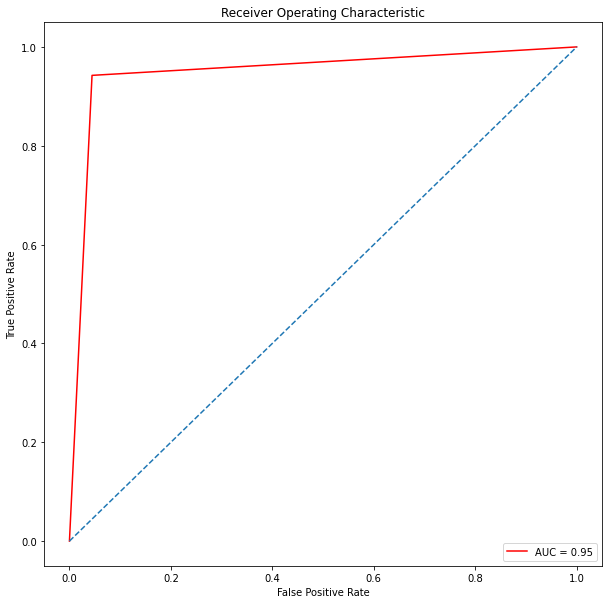

In [32]:
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label=f"AUC = {roc_auc:.2f}")
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM

In [33]:
estimator = LinearSVC()
estimator.fit(X_train, y_train)


c:\Users\seria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [34]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [35]:
score(estimator)
confusion(y_test, y_pred)

score train : 0.946 score test : 0.9459


,pred_0,pred_1
test_0,1199,58
test_1,74,1107


In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
print(roc_auc)

0.95


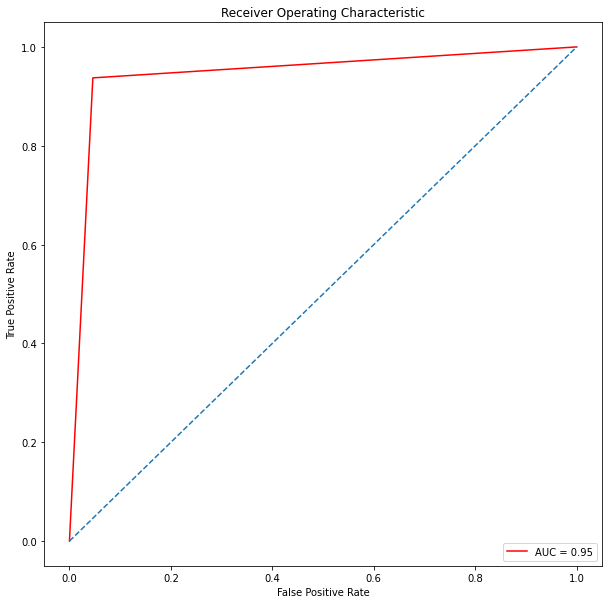

In [37]:
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label=f"AUC = {roc_auc:.2f}")
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Finding Hyper-parameters

#### Logistic Regression

In [38]:
estimator = LogisticRegression()

params = {
    'C' : np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear']
}

In [39]:
grid = GridSearchCV(estimator,
                    params,
                    cv=10,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=1
                    )
grid.fit(X_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


In [ ]:
best_params = grid.best_params_
best_params

{'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
res = grid.cv_results_

In [ ]:
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006216,0.002885,0.000000,0.000000,0.001,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.005119,0.000815,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.050051,0.005370,0.011680,0.007715,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.755712,0.789104,...,0.772718,0.771546,0.769201,0.769982,0.772177,0.771981,0.769050,0.774521,0.771368,0.001781
3,0.446205,0.084588,0.012591,0.003438,0.001,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.873462,0.899824,...,0.880399,0.880790,0.878640,0.880594,0.881008,0.881399,0.880227,0.881204,0.880330,0.001055
4,0.246985,0.037013,0.014557,0.009684,0.001,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.873462,0.899824,...,0.880399,0.880790,0.878640,0.880594,0.881008,0.881399,0.880227,0.881204,0.880330,0.001055
5,0.169814,0.022850,0.017565,0.004975,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.861160,0.891037,...,0.871409,0.869846,0.869846,0.870823,0.867722,0.871630,0.870066,0.871434,0.870110,0.001349
6,0.007873,0.002267,0.000000,0.000000,0.01,l1,newton-cg,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.006157,0.000709,0.000000,0.000000,0.01,l1,lbfgs,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.300088,0.046661,0.011200,0.005823,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.905097,0.920914,...,0.903654,0.905609,0.907758,0.904241,0.906018,0.902892,0.904259,0.903869,0.904541,0.001632
9,0.657054,0.122464,0.018334,0.007050,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.903339,0.910369,...,0.908736,0.909126,0.911276,0.908149,0.908753,0.909340,0.908949,0.909144,0.909231,0.000786


In [ ]:
cols = [i for i in res.columns if "split" not in i]
cols

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_penalty',
 'param_solver',
 'params',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'mean_train_score',
 'std_train_score']

In [ ]:
res = res[cols]
res = res.sort_values("rank_test_score")
res.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
38,22.788008,4.686314,0.015002,0.012973,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.960428,0.012740,1,0.961426,0.003571
39,1.648353,0.217018,0.008304,0.003072,1000.0,l2,newton-cg,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'newt...",0.960427,0.012621,2,0.961993,0.003726
41,1.157014,0.242070,0.010776,0.007130,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.960251,0.012445,3,0.961856,0.003681
33,1.703763,0.409862,0.010426,0.003519,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.959900,0.012461,4,0.961289,0.003506
26,24.708578,2.324938,0.014160,0.014352,10.0,l1,liblinear,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.959548,0.012713,5,0.961230,0.003567
32,23.352522,6.370320,0.015791,0.010233,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.959372,0.012650,6,0.960879,0.003719
35,0.743537,0.211717,0.009362,0.007141,100.0,l2,liblinear,"{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...",0.959020,0.012593,7,0.960859,0.003658
40,0.454849,0.081551,0.015910,0.010992,1000.0,l2,lbfgs,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953744,0.010650,8,0.955544,0.002301
27,0.922163,0.156613,0.014485,0.007488,10.0,l2,newton-cg,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.953744,0.011106,9,0.954958,0.002697
34,0.437358,0.055848,0.007729,0.005470,100.0,l2,lbfgs,"{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953569,0.010648,10,0.955857,0.002935


In [ ]:
# Filtre
def resultize(grid) :
    """make a fancy df from grid.cv_results"""

    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if "split" not in i]
    res = res[cols]
    res = res.sort_values("rank_test_score")

    return res

In [ ]:
resultize(grid).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
38,22.788008,4.686314,0.015002,0.012973,1000.0,l1,liblinear,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'libl...",0.960428,0.012740,1,0.961426,0.003571
39,1.648353,0.217018,0.008304,0.003072,1000.0,l2,newton-cg,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'newt...",0.960427,0.012621,2,0.961993,0.003726
41,1.157014,0.242070,0.010776,0.007130,1000.0,l2,liblinear,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'libl...",0.960251,0.012445,3,0.961856,0.003681
33,1.703763,0.409862,0.010426,0.003519,100.0,l2,newton-cg,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...",0.959900,0.012461,4,0.961289,0.003506
26,24.708578,2.324938,0.014160,0.014352,10.0,l1,liblinear,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.959548,0.012713,5,0.961230,0.003567
32,23.352522,6.370320,0.015791,0.010233,100.0,l1,liblinear,"{'C': 100.0, 'penalty': 'l1', 'solver': 'libli...",0.959372,0.012650,6,0.960879,0.003719
35,0.743537,0.211717,0.009362,0.007141,100.0,l2,liblinear,"{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...",0.959020,0.012593,7,0.960859,0.003658
40,0.454849,0.081551,0.015910,0.010992,1000.0,l2,lbfgs,"{'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953744,0.010650,8,0.955544,0.002301
27,0.922163,0.156613,0.014485,0.007488,10.0,l2,newton-cg,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.953744,0.011106,9,0.954958,0.002697
34,0.437358,0.055848,0.007729,0.005470,100.0,l2,lbfgs,"{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.953569,0.010648,10,0.955857,0.002935


In [ ]:
estimator = LogisticRegression(penalty="l1", C=1000, solver='liblinear')
estimator

LogisticRegression(C=1000, penalty='l1', solver='liblinear')

In [ ]:
estimator = LogisticRegression(**best_params)
estimator

LogisticRegression(C=1000.0, solver='newton-cg')

In [ ]:
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [ ]:
score(estimator)
confusion(y_test, y_pred)

score train : 0.9613 score test : 0.9619


,pred_0,pred_1
test_0,1209,48
test_1,45,1136


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [ ]:
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
roc_auc

0.96

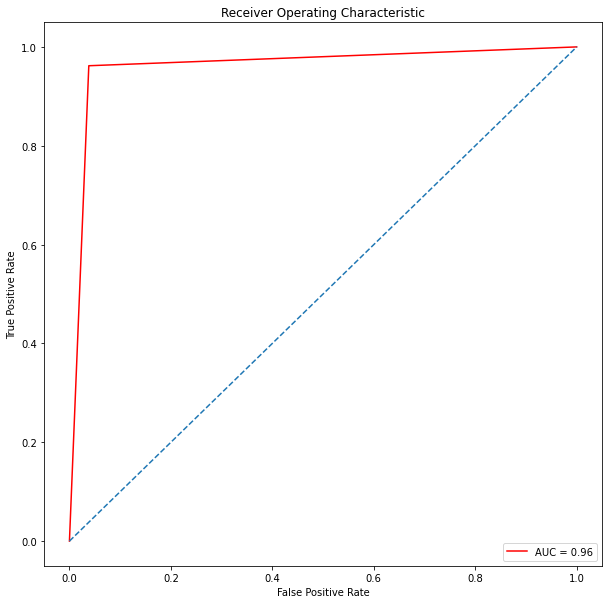

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label=f"AUC = {roc_auc:.2f}")
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### SVM

In [ ]:
estimator = LinearSVC()

params = {
    'C': np.logspace(-3, 3, 7)
}

In [ ]:
grid = GridSearchCV(estimator,
                    params,
                    cv=10,
                    n_jobs=-1,
                    return_train_score=True,
                    verbose=1
                    )
grid.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


c:\Users\seria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=10, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             return_train_score=True, verbose=1)

In [ ]:
resultize(grid).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
3,3.734244,0.372220,0.012815,0.004826,1.0,{'C': 1.0},0.949699,0.009122,1,0.949955,0.003390
2,4.001481,0.596344,0.012533,0.004774,0.1,{'C': 0.1},0.945654,0.008276,2,0.947493,0.001389
1,0.425542,0.027455,0.012721,0.004571,0.01,{'C': 0.01},0.936686,0.006242,3,0.938230,0.002168
5,3.588067,0.595953,0.014138,0.014299,100.0,{'C': 100.0},0.929131,0.042244,4,0.930452,0.036008
4,3.494553,0.363965,0.012490,0.005552,10.0,{'C': 10.0},0.927550,0.052557,5,0.930179,0.046870


In [ ]:
estimator = LinearSVC(**grid.best_params_)
estimator.fit(X_train, y_train)

c:\Users\seria\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [ ]:
score(estimator)
confusion(y_test, y_pred)

score train : 0.9481 score test : 0.9463


,pred_0,pred_1
test_0,1194,63
test_1,68,1113


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate).round(2)
roc_auc

0.95

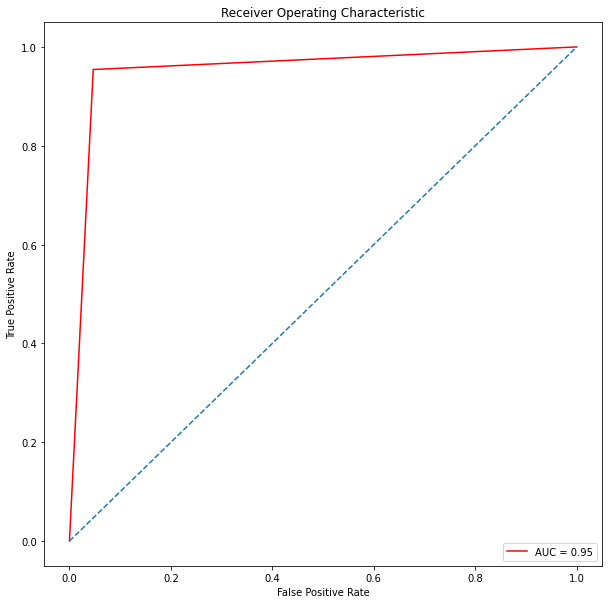

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, color="red", label=f"AUC = {roc_auc:.2f}")
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ACP

### Corrélations

In [ ]:
cmatrix = X.corr()

NameError: name 'X' is not defined